### 6.ニューラルネットワーク

### PyTorchとは…
Metaによって開発されたオープンソースの機械学習ライブラリ。大きな特徴は以下の４つ。\
1.Pythonのように使える\
2.動的計算グラフ\
3.GPUを用いた高速計算\
4.容易なモデル構築

### PyTorchと勾配法

In [1]:
!pip3 install torch


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\pgmds\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import torch

# 勾配計算を行う変数を作成
x = torch.tensor(2.0, requires_grad=True)

# 動的に異なる計算グラフを生成するループ
for i in range(5):
    # 計算グラフはループ内で毎回異なる形にする
    y = x ** (i + 1)  # iに応じて異なる計算グラフが生成される
    y.backward()      # 自動微分で勾配を計算
    
    # 勾配の値を出力
    print(f"Iteration {i+1}: y = x^{i+1}, gradient of x: {x.grad}")
    
    # 勾配をリセットして次のループで再度計算
    x.grad.zero_()


Iteration 1: y = x^1, gradient of x: 1.0
Iteration 2: y = x^2, gradient of x: 4.0
Iteration 3: y = x^3, gradient of x: 12.0
Iteration 4: y = x^4, gradient of x: 32.0
Iteration 5: y = x^5, gradient of x: 80.0


### テンソル(Tensor)の計算
テンソルとは多次元配列クラスのこと。NumPyのnp.ndarrayと同じように使える。

In [3]:
import torch

x = torch.tensor(5.0)
y = 3 * x ** 2
print(y)

tensor(75.)


PyTorchで微分を求める。tensorインスタンスのbackward()メソッドを使う。

In [4]:
x = torch.tensor(5.0,requires_grad=True)
y = 3 * x ** 2

y.backward()
print(x.grad)

tensor(30.)


### 勾配法
PyTorchを使って次式の最小値を見つけていく。
\begin{equation*}
y = 100(x_{1}-x_{0}^2)^2 + (x_{0}-1)^2
\end{equation*}

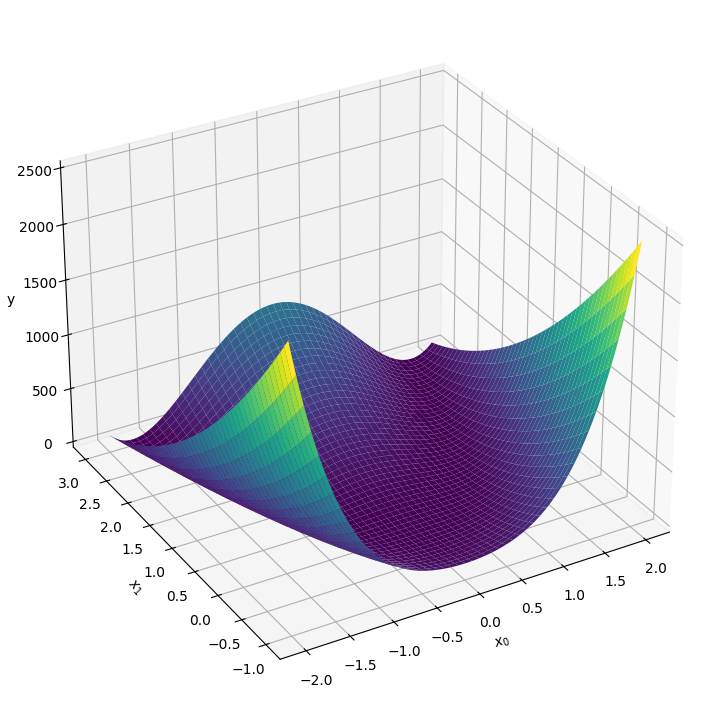

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

#x軸,y軸の値作成
x0_line = np.linspace(-2.0,2.0,num=500)
x1_line = np.linspace(-1.0,3.0,num=500)

#格子状の点を作成
x0,x1 = np.meshgrid(x0_line,x1_line)

#ローゼンブロック関数の計算
y = 100.0 * (x1 - x0 ** 2) ** 2 + (x0 - 1.0) ** 2

#プロット
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x0,x1,y,cmap='viridis')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('y')
ax.view_init(elev=30, azim=240)
plt.show()

解析的に解くことができる。
\begin{equation*}
    \begin{cases}
    \frac{\partial y}{\partial x_{0}} = 400x_{0}^3 - 400x_{0}x_{1} + 2x_{0} - 2 = 0\\
    \frac{\partial y}{\partial x_{1}} = 200x_{1} - 200x_{0}^2 = 0
    \end{cases}
\end{equation*}
この連立方程式を解くと$(x_{0},x_{1})=(1,1)$となる。
これをPyTorchを使った勾配法によって求めていきたい。そのために、まずは$\frac{\partial y}{\partial x_{0}}$と$\frac{\partial y}{\partial x_{1}}$を求める。

In [6]:
import torch

def rosenbrock(x0,x1):
    y = 100.0 * (x1 - x0 ** 2) ** 2 + (x0 - 1.0) ** 2
    return y

x0 = torch.tensor(0.0,requires_grad=True)
x1 = torch.tensor(2.0,requires_grad=True)

y = rosenbrock(x0,x1)
y.backward()
print(x0.grad,x1.grad)

tensor(-2.) tensor(400.)


上のように、$x_{0}=0,x_{1}=2$における微分を(-2,400)のベクトル表記にしたものを勾配(Gradient)と言う。

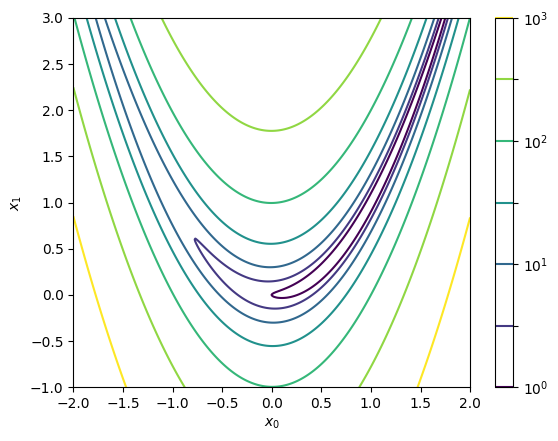

In [7]:
x0_line = np.arange(-2.0,2.01,0.01)
x1_line = np.arange(-1.0,3.01,0.01)

x0,x1 = np.meshgrid(x0_line,x1_line)
y = rosenbrock(x0,x1)

levs = 10**np.arange(0.,3.5,0.5)

plt.contour(x0,x1,y,norm=LogNorm(),levels=levs,cmap='viridis')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')

plt.show()

In [8]:
x0 = torch.tensor(0.0,requires_grad=True)
x1 = torch.tensor(2.0,requires_grad=True)

lr = 0.001 #学習率
iter = 10000 #繰り返し回数

for i in range(iter):
    if i % 1000 == 0: #1000回ごとに出力
        print(x0.item(), x1.item())
    
    y = rosenbrock(x0, x1)
    y.backward() 

    #値の更新
    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

    #勾配の初期化
    x0.grad.zero_()
    x1.grad.zero_()

print(x0.item(),x1.item()) 

0.0 2.0
0.6837119460105896 0.4659528136253357
0.8263181447982788 0.6820318102836609
0.8947840929031372 0.8001903295516968
0.9334872364997864 0.8711214661598206
0.9569892883300781 0.9156519174575806
0.9718162417411804 0.9443121552467346
0.9813804626464844 0.9630323052406311
0.98763507604599 0.9753732085227966
0.9917610883712769 0.983556866645813
0.9944981336593628 0.9890044331550598


.item()は要素が1つだけのテンソルに対して使うことができる。テンソルからPythonの数値に変換する。

0.0 2.0
0.6837119460105896 0.4659528136253357
0.8263181447982788 0.6820318102836609
0.8947840929031372 0.8001903295516968
0.9334872364997864 0.8711214661598206
0.9569892883300781 0.9156519174575806
0.9718162417411804 0.9443121552467346
0.9813804626464844 0.9630323052406311
0.98763507604599 0.9753732085227966
0.9917610883712769 0.983556866645813
0.9944981336593628 0.9890044331550598


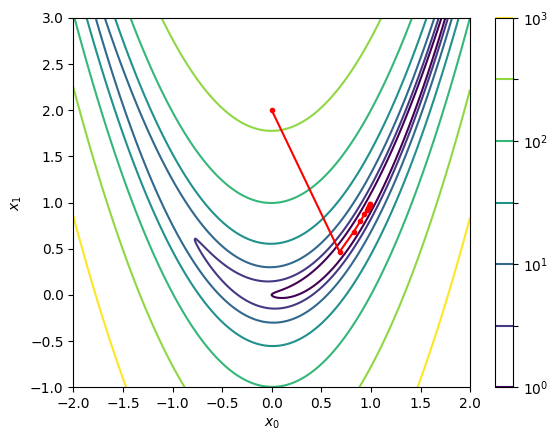

In [9]:
x0_line = np.arange(-2.0,2.01,0.01)
x1_line = np.arange(-1.0,3.01,0.01)

x0_grad,x1_grad = np.meshgrid(x0_line,x1_line)
z = rosenbrock(x0_grad,x1_grad)

levs = 10**np.arange(0.,3.5,0.5)

x0 = torch.tensor(0.0,requires_grad=True)
x1 = torch.tensor(2.0,requires_grad=True)

lr = 0.001 #学習率
iter = 10000 #繰り返し回数

# 値の履歴を保存するリスト
x0_history = []
x1_history = []

for i in range(iter):
    if i % 1000 == 0:
        print(x0.item(), x1.item())
        x0_history.append(x0.item())
        x1_history.append(x1.item())
    
    y = rosenbrock(x0, x1)
    y.backward()

    #値の更新
    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

    #勾配の初期化
    x0.grad.zero_()
    x1.grad.zero_()

print(x0.item(),x1.item())
x0_history.append(x0.item())
x1_history.append(x1.item())

plt.contour(x0_grad,x1_grad,z,norm=LogNorm(),levels=levs,cmap='viridis')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')

plt.plot(x0_history, x1_history, 'ro-', markersize=3)
plt.show()

### 線形回帰

トイ・データセット
\begin{equation*}
y = 2x + 5 + \varepsilon
\end{equation*}
$\varepsilon$は0から1の間の乱数を一様分布から生成するノイズ。

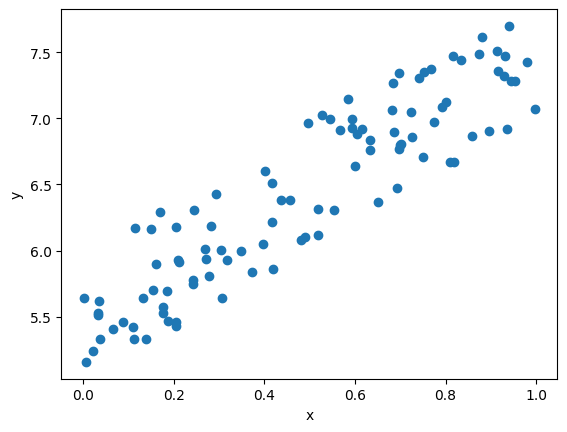

In [10]:
#トイ・データセットの作成
torch.manual_seed(0) #乱数のシードを固定
x = torch.rand(100,1) #100行1列の乱数行列を生成
y = 2 * x + 5 +torch.rand(100,1) 

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x.numpy(),y.numpy(),'o')

torch.manual_seed(0):\
乱数シードを固定する関数。これを設定すると乱数を再現できるようになるため、コードを実行するたびに同じ乱数が生成されて結果が同じになる。

線形回帰の実装

In [11]:
#トイ・データセット
torch.manual_seed(0)
x = torch.rand(100,1)
y = 5 + 2 * x + torch.rand(100,1) 

W = torch.zeros((1,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

def predict(x):
    y = x @ W + b #行列積の演算子@
    return y

def mean_squared_error(x0,x1):
    diff = x0 - x1
    N = len(diff)
    return torch.sum(diff ** 2) / N

lr = 0.1
iters = 100

for i in range(iters):
    y_hat = predict(x)
    loss = mean_squared_error(y,y_hat)

    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    W.grad.zero_()
    b.grad.zero_()

    if i % 10 == 0: #10回ごとに出力
        print(loss.item())

print(loss.item())
print('===')
print('W=',W.item())
print('b=',b.item())

41.89796447753906
0.22483211755752563
0.0925208106637001
0.0888015553355217
0.08627457916736603
0.08435674756765366
0.0829005315899849
0.0817948430776596
0.08095530420541763
0.08031783998012543
0.07987643033266068
===
W= 2.2863590717315674
b= 5.3144850730896


In [12]:
import torch.nn.functional as F

#mean_squared_error関数と同じ役割の関数↓
loss = F.mse_loss(y,y_hat)
print(loss.item())

0.07987643033266068


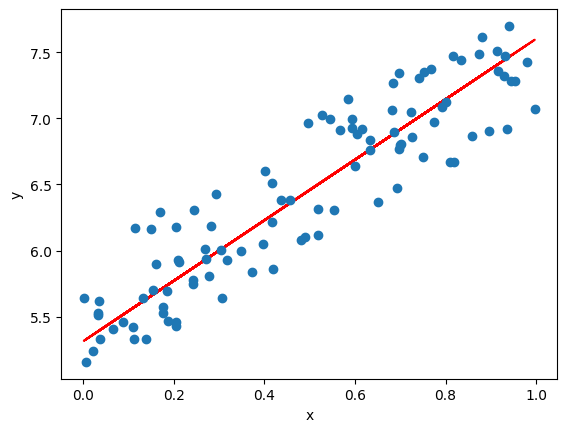

In [13]:
plt.xlabel('x')
plt.ylabel('y')
y_line = W.item() * x + b.item()
plt.plot(x.numpy(),y_line.numpy(),label='y=Wx+b',color='red')
plt.plot(x.numpy(),y.numpy(),'o')

以下3つのような、パラメータを自動で管理してくれる仕組みがPyTorchに用意されている。\
・torch.nn.Parameterクラス\
・torch.nn.Moduleクラス\
・torch.optim.SGDクラス\
今まで解いた問題をこれらのクラスを用いて書いていく。

ParameterはTensorクラスを継承しているため、Tensorと同様の数値計算に加えて、ニューラルネットワークのパラメータとして扱われる機能を持つ。

In [14]:
import torch.nn as nn

W = nn.Parameter(torch.zeros(1,1))
b = nn.Parameter(torch.zeros(1))

print(W)
print(b)

Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [15]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.W = nn.Parameter(torch.zeros(1,1))
        self.b = nn.Parameter(torch.zeros(1))
    
    def forward(self,x):
        y = x @ self.W + self.b
        return y

model = Model()

#モデルにある全てのパラメータを取得
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [16]:
class Model(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size)
    
    def forward(self,x):
        y = self.linear(x)
        return y
    
model = Model()

#モデルにある全てのパラメータを取得
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.0421]], requires_grad=True)
Parameter containing:
tensor([0.6446], requires_grad=True)


### オプティマイザ(Opitimizer)
最適化手法を具体的に実装したもの。$y = 2x + 5 + \varepsilon$の問題をオプティマイザを使って実装してみる

In [17]:
x = torch.rand(100,1)
y = 2 * x + 5 + torch.rand(100,1)

lr = 0.1
iters = 100

model = Model()
#オプティマイザの生成
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

for i in range(iters):
    y_hat = model(x)
    loss = F.mse_loss(y,y_hat)

    loss.backward()
    optimizer.step() #パラメータの更新
    optimizer.zero_grad() #勾配の初期化

#モデルにある全てのパラメータを取得
for param in model.parameters():
    print(param)
    

Parameter containing:
tensor([[1.9579]], requires_grad=True)
Parameter containing:
tensor([5.5788], requires_grad=True)


SGD以外にも\
Momentum\
AdaGrad\
AdaDelta\
Adam\
などの手法がある。

###     ニューラルネットワークの実装
これまでPyTorchを使って線形回帰の実装をしてきたため、ニューラルネットワークの実装もやってみる！

非線形なデータセットのために以下の式の関係にある(x,y)を対象とする。
\begin{equation*}
y = sin(2\pi x) + \varepsilon
\end{equation*}


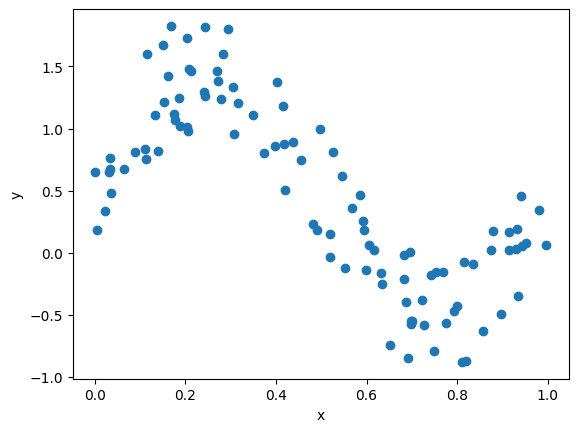

In [18]:
torch.manual_seed(0)
x = torch.rand(100,1)
y = torch.sin(2 * torch.pi * x) + torch.rand(100,1)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x.numpy(),y.numpy(),'o')

ニューラルネットワークでは非線形変換が、テンソルの行列の各要素に対して同じ式で計算される。sigmoidやReLuなどの関数は以下のように使う。

In [19]:
import torch.nn.functional as F
a = torch.rand(100, 5)

b = F.sigmoid(a)
c  = F.relu(a)


In [20]:
#2層のニューラルネットワーク
class Model(nn.Module):
    def __init__(self, input_size=1, hidden_size=10, output_size=1):
        super().__init__()
        self.linear1 = nn.Linear(input_size,hidden_size)
        self.linear2 = nn.Linear(hidden_size,output_size)
    
    def forward(self,x):
        y = self.linear1(x)
        y = F.sigmoid(y)
        y = self.linear2(y)
        return y

In [21]:
#学習
lr = 0.2
iters = 10000

model = Model()
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

for i in range(iters):
    y_pred = model(x)
    loss = F.mse_loss(y,y_pred)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if i % 1000 == 0:
        print(loss.item())

print(loss.item())


0.9632321000099182
0.23952198028564453
0.23782417178153992
0.2340301126241684
0.22124026715755463
0.18503564596176147
0.11828000098466873
0.08544430136680603
0.0822950154542923
0.0817379280924797
0.08144207298755646


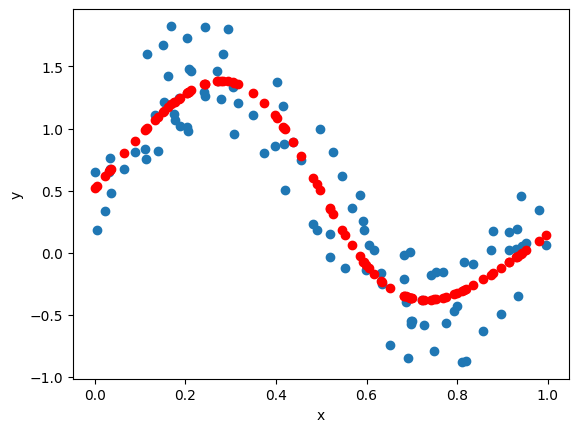

In [22]:
#プロット
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x.numpy(),y.numpy(),'o')
plt.plot(x.numpy(),y_pred.data.numpy(),'o',color='red')

### torchvisionとデータセット
torchvision:\
PyTorch用の画像処理ライブラリ。データの読み込みや前処理ができる。


In [23]:
!pip3 install torchvision


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\pgmds\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [24]:
import torchvision

print(torchvision.__version__)

0.19.1+cpu


size: 60000
type: <class 'PIL.Image.Image'>
label: 5


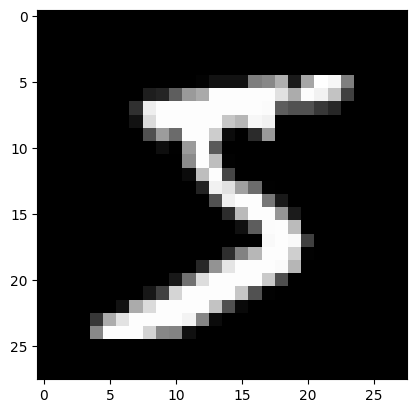

In [25]:
#MNISTデータセットの読み込み
dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=None,
    download=True
)

x,label = dataset[0]

print('size:',len(dataset))
print('type:',type(x))
print('label:',label)

plt.imshow(x,cmap='gray')
plt.show()

今ダウンロードしたMNISTデータセットはImageクラスなので、PyTorchで操作するためにTensorクラスに変換する。

In [26]:
import torchvision.transforms as transforms

transform = transforms.ToTensor() #画像をテンソルに変換

dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

x,label = dataset[0]
print('type:',type(x))
print('shape:',x.shape)

type: <class 'torch.Tensor'>
shape: torch.Size([1, 28, 28])


In [27]:
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=32,
    shuffle=True
)

for x,label in dataloader:
    print('x shape:',x.shape)
    print('label shape:',label.shape)
    break

x shape: torch.Size([32, 1, 28, 28])
label shape: torch.Size([32])
